# **Visualización para análisis exporatorio**
# AE07. Seaborn Heatmaps, Histogramas y Boxplot

Veamos más tipos de gráficos en Seaborn:


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# Importamos las librerías adicionales para el manejo numérico y de DataFrame
import numpy as np
import pandas as pd

In [ ]:
sns.set(context='notebook', style='darkgrid', palette='dark')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
penguins_df = pd.read_csv("/content/drive/MyDrive/Data_Science/AnálisisExploratorioYEstadística/Rodrigo/Archivos/VD02.csv").dropna()
penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male


## <font color='blue'>__Matriz de correlación y Mapas de calor (Heatmap)__</font>

Utilizando matplotlib, generar un mapa de calor con anotaciones eran varias líneas de código, era difícil que los valores numéricos quedaran correctamente alineados al centro de cada valor de heatmap, y eran varios métodos para construir un heatmap de principio a fin. `Seaborn` implementa el método `sns.heatmap(data)`, el cual realiza todas las operaciones necesarias para generar un mapa de calor. El parametro `data` puede ser tanto un `DataFrame` o una matriz de Numpy, recordar que si utilizamos un `DataFrame`, `Seaborn` va a extraer los nombres de las filas y columnas asociadas a la matriz a graficar.

Además, utilizando el parámetro `annot=True`, permitimos generar un heatmap con anotaciones. Estas anotaciones estarán correctamente alineadas y el uso de color se generará automáticamente para una máxima legibilidad de las anotaciones:

[Documentación Heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html?highlight=heatmap#seaborn.heatmap)


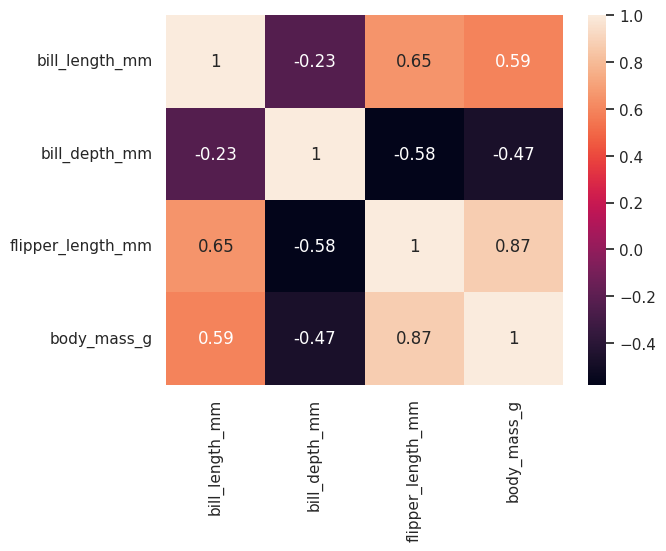

In [ ]:
corr = penguins_df.corr(numeric_only=True) # Obtenemos la matriz de correlación para las variables númericas del set de datos de pingüinos

sns.heatmap(corr, annot=True) #Generamos el heatmap anotado
plt.show()

<font color='purple'>**EXPERIMENTO**</font><br>

El triángulo superior no aporta nueva información respecto al inferior. Buscaremos la forma de no mostrarlo.


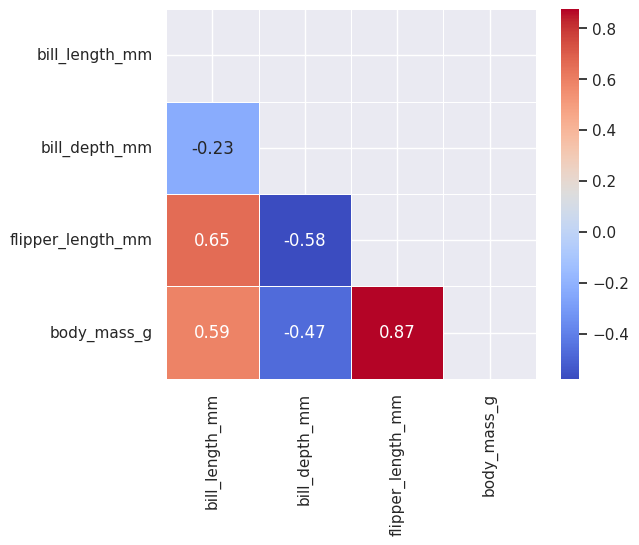

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calcula la matriz de correlación
corr = penguins_df.corr(numeric_only=True)

# Crea una máscara para ocultar el triángulo superior
mask = np.triu(np.ones_like(corr, dtype=bool))

# Genera el heatmap con la máscara aplicada
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', square=True, linewidths=0.5)

# Muestra el gráfico
plt.show()

**Explicación de los cambios:**

**np.triu:** Crea una matriz booleana con True en el triángulo superior. Esto sirve como máscara.

**mask=mask:** Pasa la máscara al heatmap para que Seaborn oculte esos valores.

**Otros argumentos (opcional):**

**cmap='coolwarm':** Cambia el mapa de colores del gráfico (puedes ajustarlo según tus preferencias).

**square=True:** Hace que las celdas sean cuadradas.

**linewidths=0.5:** Define el grosor de las líneas que separan las celdas.

Con este ajuste, el heatmap solo mostrará la mitad inferior de la matriz de correlación. 😊

<font color='purple'>**FIN EXPERIMENTO**</font><br>

## <font color='blue'>__Histogramas__</font>

Recientemente, en la última versión de Seaborn (0.11), se implementó el método `histplot`. Tal como lo menciona el título de esta sección, corresponde al uso de histogramas, y la lógica de uso se mantiene. Existe un parámetro, denominado `kde`, el cual recibe un valor `Booleano` y nos permite graficar el *Kernel Density Estimate*. Esta característica permite estimar una distribución continua desde el histograma, y por lo mismo podríamos ver la existencia de asimetría presente en los datos a graficar.

[Documentación Histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html?highlight=histplot#seaborn.histplot)


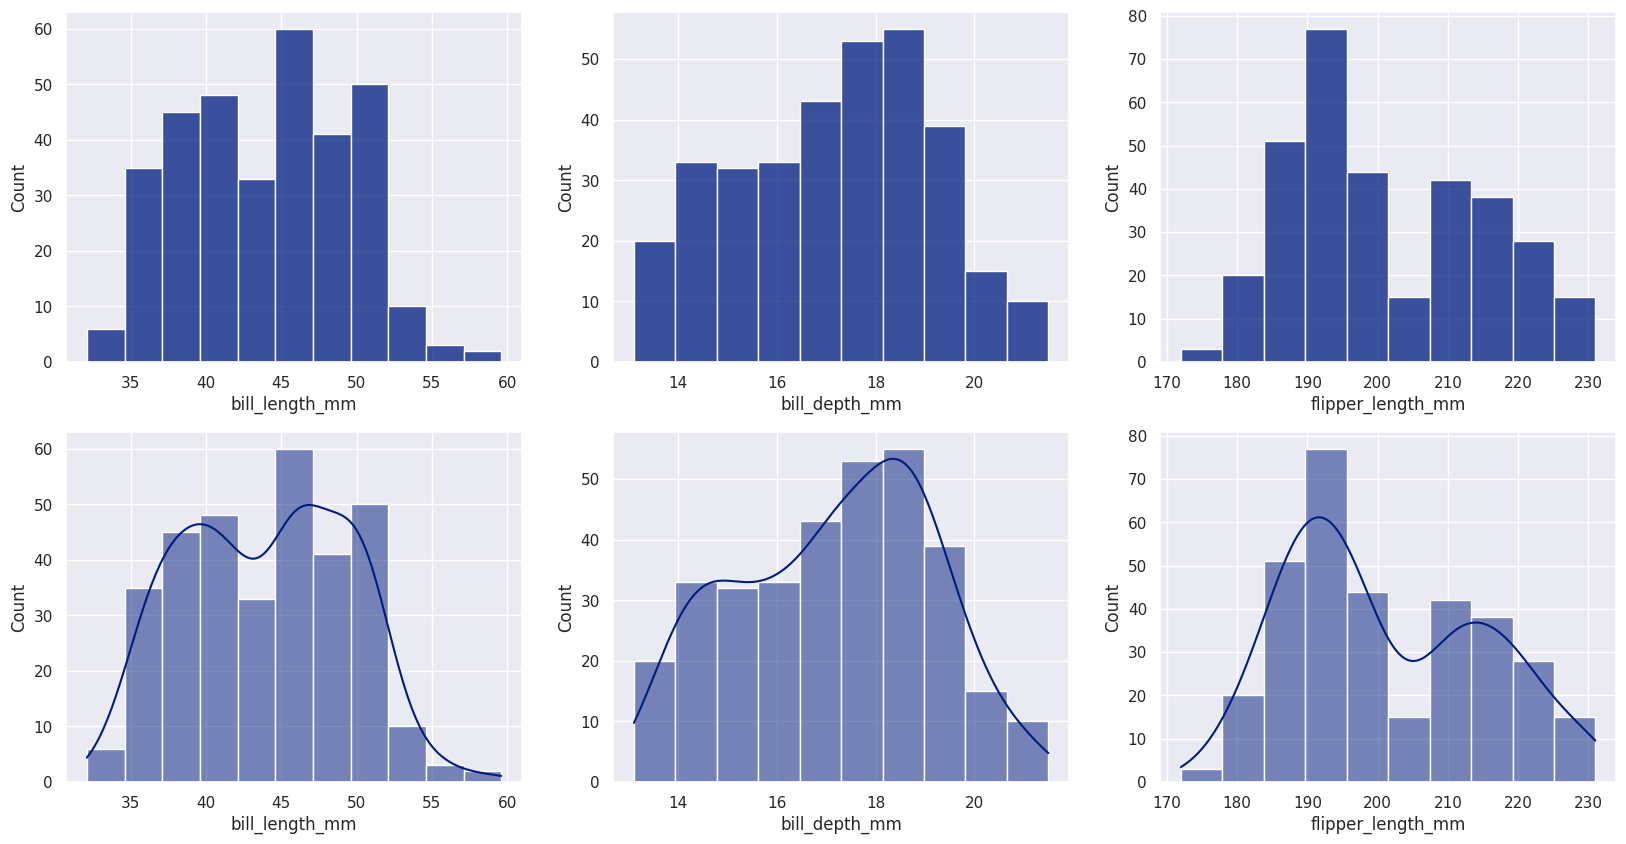

In [ ]:
fig, ax = plt.subplots(2,3, figsize=(20,10) )
# subplots con el método histoplot a secas
sns.histplot(x='bill_length_mm', data = penguins_df, ax = ax[0,0])
sns.histplot(x='bill_depth_mm', data = penguins_df, ax = ax[0,1])
sns.histplot(x='flipper_length_mm', data = penguins_df, ax = ax[0,2])
# subplots con el método histplot y el gráfico de KDE
sns.histplot(x='bill_length_mm', data = penguins_df, kde=True, ax = ax[1,0])
sns.histplot(x='bill_depth_mm', data = penguins_df, kde=True, ax = ax[1,1])
sns.histplot(x='flipper_length_mm', data = penguins_df, kde=True, ax = ax[1,2])
plt.show()

## <font color='blue'>__Diagramas de caja y bigotes (Boxplots)__</font>

`Seaborn`, como buena librería de cómputo estadístico, también provee el método para realizar diagramas de cajas y bigotes. Las ventajas siguen siendo la facilidad de uso de `Seaborn` por sobre `matplotlib`, además de la mejora estética al momento de uso de colores, y modificaciones a los marcadores de outlets:

[Documentación Boxplots](https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot)


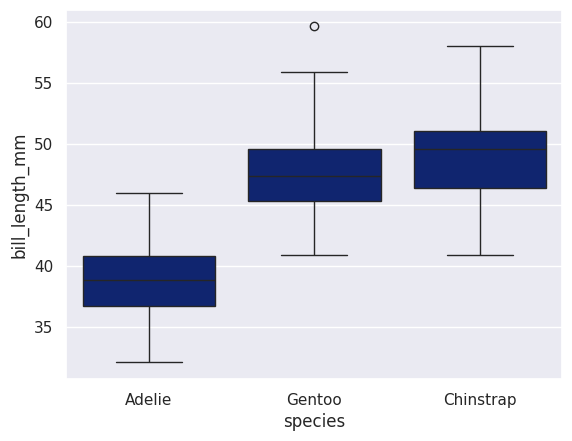

In [ ]:
sns.boxplot(x='species', y='bill_length_mm', data=penguins_df)
plt.show()

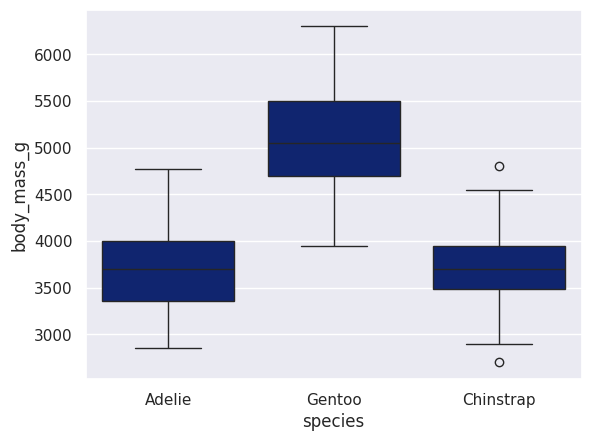

In [ ]:
sns.boxplot(x='species', y='body_mass_g', data=penguins_df)
plt.show()

Recordando que al estar utilizando `seaborn`, podemos hacer la separación de nuestros gráficos según las columnas que nosotros especifiquemos. A modo de ejemplo, separaremos los boxplots obtenidos anteriormente por la columna `sex`:

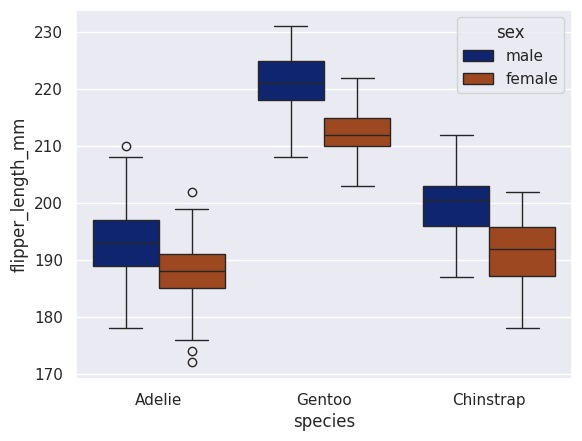

In [ ]:
sns.boxplot(x='species', y='flipper_length_mm', data=penguins_df, hue='sex')
plt.show()

<font color='purple'>**MATERIAL ADICIONAL**</font><br>

**Histograma:** Se utiliza principalmente para visualizar la distribución de datos continuos y detectar patrones como la simetría, sesgos, o presencia de varios picos.

Con Seaborn, puedes usar sns.histplot() para crear histogramas que incluyan estimación de densidad de kernel (KDE), lo que permite visualizar tanto el histograma como una curva suave que estima la distribución. Esto no es tan directo en Matplotlib, donde necesitas calcular manualmente el KDE.

**Boxplot:** Seaborn sobresale al crear gráficos boxplot con swarms (puntos individuales) usando funciones como sns.boxplot() y sns.swarmplot(). Los puntos ayudan a entender la distribución completa de los datos, lo que no es posible con un boxplot básico en Matplotlib.

Los boxplots de Seaborn te permiten combinar información categórica y continua fácilmente, mostrando tendencias o diferencias por grupo. Además, puedes personalizar colores de categorías automáticamente con la paleta integrada de Seaborn.

**Diferencias entre Seaborn y Matplotlib**

**Seaborn:**

Ofrece un nivel de abstracción más alto que Matplotlib, lo que facilita la creación de gráficos complejos como boxplots o violinplots sin necesidad de ajustar cada detalle.
Integra automáticamente colores agradables y personalizables.
Perfecto para análisis estadístico debido a la integración con pandas.

**Matplotlib:**

Más flexible pero requiere más código para producir gráficos complejos.
Adecuado para diseños altamente personalizados.
No tiene funciones especializadas para análisis estadístico (debes escribir más código para lograr resultados similares a Seaborn).


**Documentación oficial de Seaborn:**
https://seaborn.pydata.org

A continuación dejamos un ejemplo con las diferencias (escrito en código)

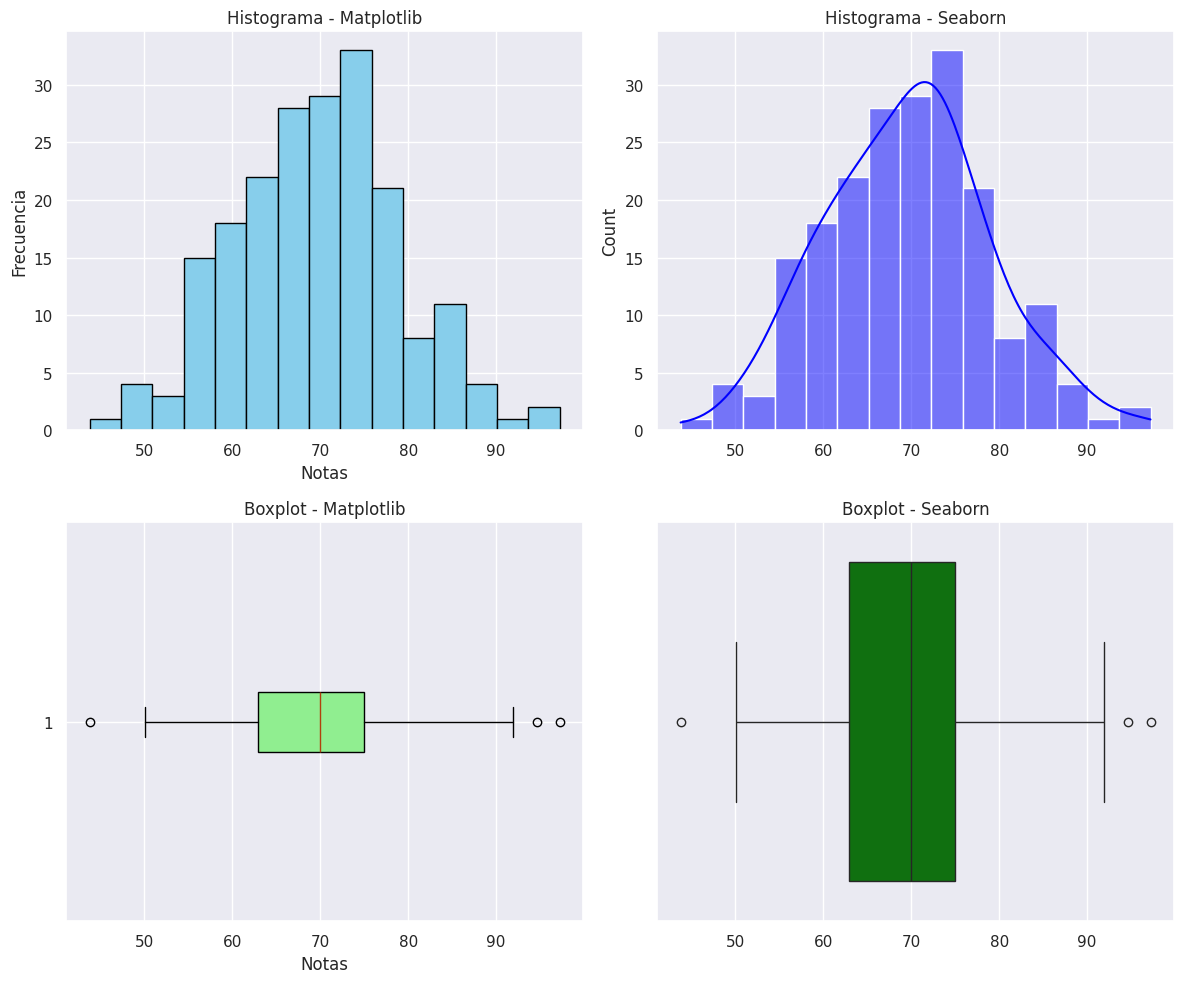

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Generar datos simulados: notas de estudiantes
np.random.seed(42)
notas = np.random.normal(loc=70, scale=10, size=200)  # Media=70, Desviación estándar=10

# Crear subgráficos para comparar Seaborn y Matplotlib
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Histograma con Matplotlib
axs[0, 0].hist(notas, bins=15, color='skyblue', edgecolor='black')
axs[0, 0].set_title("Histograma - Matplotlib")
axs[0, 0].set_xlabel("Notas")
axs[0, 0].set_ylabel("Frecuencia")

# Histograma con Seaborn
sns.histplot(notas, bins=15, kde=True, color="blue", ax=axs[0, 1])
axs[0, 1].set_title("Histograma - Seaborn")

# Boxplot con Matplotlib
axs[1, 0].boxplot(notas, vert=False, patch_artist=True, boxprops=dict(facecolor="lightgreen"))
axs[1, 0].set_title("Boxplot - Matplotlib")
axs[1, 0].set_xlabel("Notas")

# Boxplot con Seaborn
sns.boxplot(x=notas, color="green", ax=axs[1, 1])
axs[1, 1].set_title("Boxplot - Seaborn")

# Ajustar diseño
plt.tight_layout()
plt.show()


<font color='purple'>**FIN MATERIAL ADICIONAL**</font><br>

<font color='purple' style='bold' size=5>**Experimento** </font>

Nos llama la atención que la asignación de la cantidad de bins  de un histograma es manual, entonces investigamos y encontramos que existe una fórmula que nos permite elegir una cantidad de bins ideal para un histograma.

La fórmula es llamada la Regla de Sturge, tomando en consideración la cantidad de valores en la muestra:

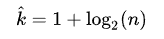

Entonces, este experimento consiste en definir una función que tome como argumento una serie de pandas y devuelve el número de bins para esa serie.







La función de Sturges definió 9 bins



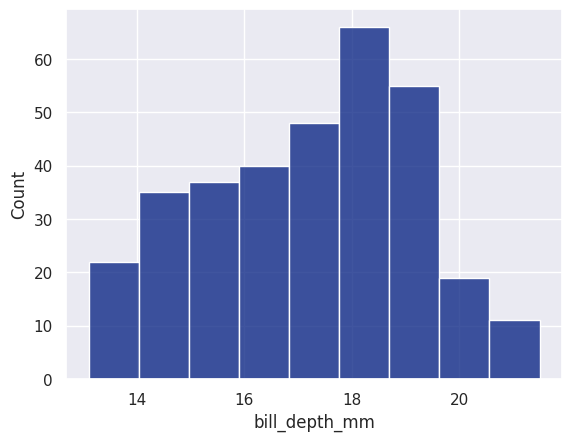

In [ ]:
import math

def sturges(serie):
    return 1 + int(math.log2(len(serie)))

# probamos la función

sns.histplot(x='bill_depth_mm', data = penguins_df, bins=sturges(penguins_df['bill_depth_mm']))
print(f"La función de Sturges definió {sturges(penguins_df['bill_depth_mm'])} bins\n")
plt.show()

<font color='purple' size=5 >**Fin experimento** </font>